In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

ModuleNotFoundError: No module named 'seaborn'

In [2]:
this_dir = Path.cwd()
dataset_file = this_dir / "data/pd_speech_features.ods" 

In [3]:
df = pd.read_excel(dataset_file, header=[0, 1], engine="odf")
df.head()

Basic Info        Baseline Features                              \
          id gender               PPE      DFA     RPDE numPulses   
0          0      1           0.85247  0.71826  0.57227       240   
1          0      1           0.76686  0.69481  0.53966       234   
2          0      1           0.85083  0.67604  0.58982       232   
3          1      0           0.41121  0.79672  0.59257       178   
4          1      0           0.32790  0.79782  0.53028       236   

                                                                     ...  \
  numPeriodsPulses meanPeriodPulses stdDevPeriodPulses locPctJitter  ...   
0              239         0.008064           0.000087      0.00218  ...   
1              233         0.008258           0.000073      0.00195  ...   
2              231         0.008340           0.000060      0.00176  ...   
3              177         0.010858           0.000183      0.00419  ...   
4              235         0.008162           0.002669      0.00535  ...   

              TQWT Features                            \
  tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29   
0                    1.5620                    2.6445   
1                    1.5589                    3.6107   
2                    1.5643                    2.3308   
3                    3.7805                    3.5664   
4                    6.1727                    5.8416   

                                                       \
  tqwt_kurtosisValue_dec_30 tqwt_kurtosisValue_dec_31   
0                    3.8686                    4.2105   
1                   23.5155                   14.1962   
2                    9.4959                   10.7458   
3                    5.2558                   14.0403   
4                    6.0805                    5.7621   

                                                       \
  tqwt_kurtosisValue_dec_32 tqwt_kurtosisValue_dec_33   
0                    5.1221                    4.4625   
1                   11.0261                    9.5082   
2                   11.0177                    4.8066   
3                    4.2235                    4.6857   
4                    7.7817                   11.6891   

                                                       \
  tqwt_kurtosisValue_dec_34 tqwt_kurtosisValue_dec_35   
0                    2.6202                    3.0004   
1                    6.5245                    6.3431   
2                    2.9199                    3.1495   
3                    4.8460                    6.2650   
4                    8.2103                    5.0559   

                            Class  
  tqwt_kurtosisValue_dec_36 class  
0                   18.9405     1  
1                   45.1780     1  
2                    4.7666     1  
3                    4.0603     1  
4                    6.1164     1  

[5 rows x 755 columns]

## Participants profile

In [4]:
par_df = pd.concat([df['Basic Info'], df['Class']], axis=1)
par_df.head()

,id,gender,class
0,0,1,1
1,0,1,1
2,0,1,1
3,1,0,1
4,1,0,1


In [5]:
grouped_by_parti = par_df.groupby("id")
participants_count = len(grouped_by_parti)
print("Total No of participants : ", participants_count)

Total No of participants :  252


In [6]:
participants_profile = []
for ind , grp in grouped_by_parti:
    ag = grp['gender'].to_numpy()
    assert (ag[0] == ag).all()
    ac = grp['class'].to_numpy()
    assert (ac[0] == ac).all()
    participants_profile.append((ind, len(grp), ag[0], ac[0]))

participants_profile = pd.DataFrame(participants_profile, columns=['Participant ID', 'Instance Count', 'Gender', 'Parkinson-s disease'])
participants_profile.head()

,Participant ID,Instance Count,Gender,Parkinson-s disease
0,0,3,1,1
1,1,3,0,1
2,2,3,1,1
3,3,3,0,1
4,4,3,0,1


In [7]:
participants_profile['Instance Count'].describe()

count    252.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
Name: Instance Count, dtype: float64

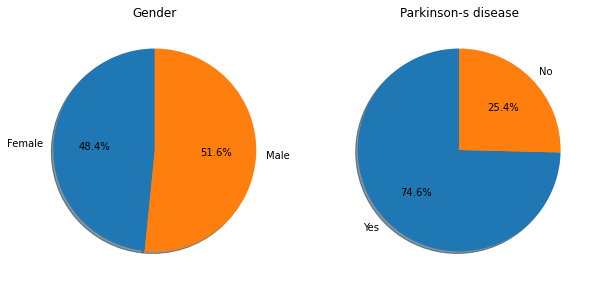

In [8]:
plt.figure(figsize=(10,10))

gender_count = participants_profile['Gender'].value_counts()
labels = ['Female', 'Male']
sizes = (gender_count[0], gender_count[1])
ax1 = plt.subplot(121)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Gender')

pk_count = participants_profile['Parkinson-s disease'].value_counts()
labels = ['Yes', 'No']
sizes = (pk_count[1], pk_count[0])
ax2 = plt.subplot(122)
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title('Parkinson-s disease')
plt.show()

## Feature profile

In [12]:
feature_df = pd.DataFrame(list(df.columns.values), columns=['Feature Type', 'Features'])
feature_df.head()

,Feature Type,Features
0,Basic Info,id
1,Basic Info,gender
2,Baseline Features,PPE
3,Baseline Features,DFA
4,Baseline Features,RPDE


In [10]:
grouped = feature_df.groupby('Feature Type')
feature_count = {grp_name: len(ids) for grp_name, ids in grouped.groups.items()}
del feature_count['Basic Info'], feature_count['Class']
feature_count

{'Bandwidth Parameters': 4,
 'Baseline Features': 21,
 'Formant Frequencies': 4,
 'Intensity Parameters': 3,
 'MFCC': 84,
 'TQWT Features': 432,
 'Vocal Fold': 22,
 'Wavelet Features': 182}

<BarContainer object of 8 artists>

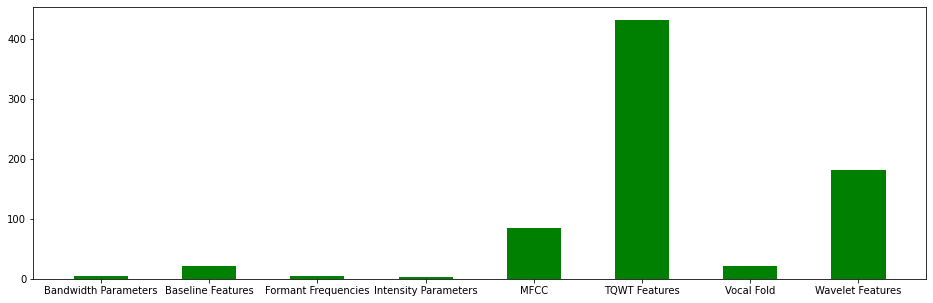

In [11]:
f, ax = plt.subplots(figsize=(16,5))
ax.bar(feature_count.keys(), feature_count.values(), width=.5, color='g')

### Baseline Features

**PPE** - Pitch Period Entropy


In [12]:
baseline_features = df['Baseline Features']
baseline_features.head()

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity
0,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,...,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995
1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,...,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497
2,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,...,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651
3,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,...,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865
4,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,0.00166,...,0.00499,0.05610,0.497,0.02909,0.03327,0.05278,0.08728,0.975754,0.027139,19.557


In [13]:
baseline_features.describe()

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,756.000000,...,756.000000,756.000000,756.00000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,0.000605,...,0.001815,0.067473,0.60642,0.034375,0.041175,0.055366,0.103125,0.961508,0.051131,18.859632
std,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,2.290134e-05,0.000981,...,0.002942,0.042969,0.38257,0.022366,0.027165,0.033939,0.067097,0.064095,0.104579,5.576473
min,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,6.860000e-07,0.000020,...,0.000050,0.006560,0.05700,0.003350,0.004150,0.000370,0.010040,0.589609,0.000618,1.655000
25%,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,5.260000e-06,0.000150,...,0.000450,0.036098,0.31875,0.017843,0.021935,0.030963,0.053538,0.963341,0.007168,15.713250
50%,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,9.530000e-06,0.000280,...,0.000840,0.055730,0.50250,0.027980,0.033705,0.047545,0.083945,0.984339,0.016273,19.309500
75%,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,1.832500e-05,0.000650,...,0.001952,0.085547,0.79650,0.044665,0.053022,0.071385,0.134000,0.992916,0.040061,22.877750
max,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,2.564800e-04,0.011050,...,0.033150,0.251010,2.11400,0.130510,0.199510,0.277500,0.391540,0.999382,0.761696,33.197000


<AxesSubplot:>

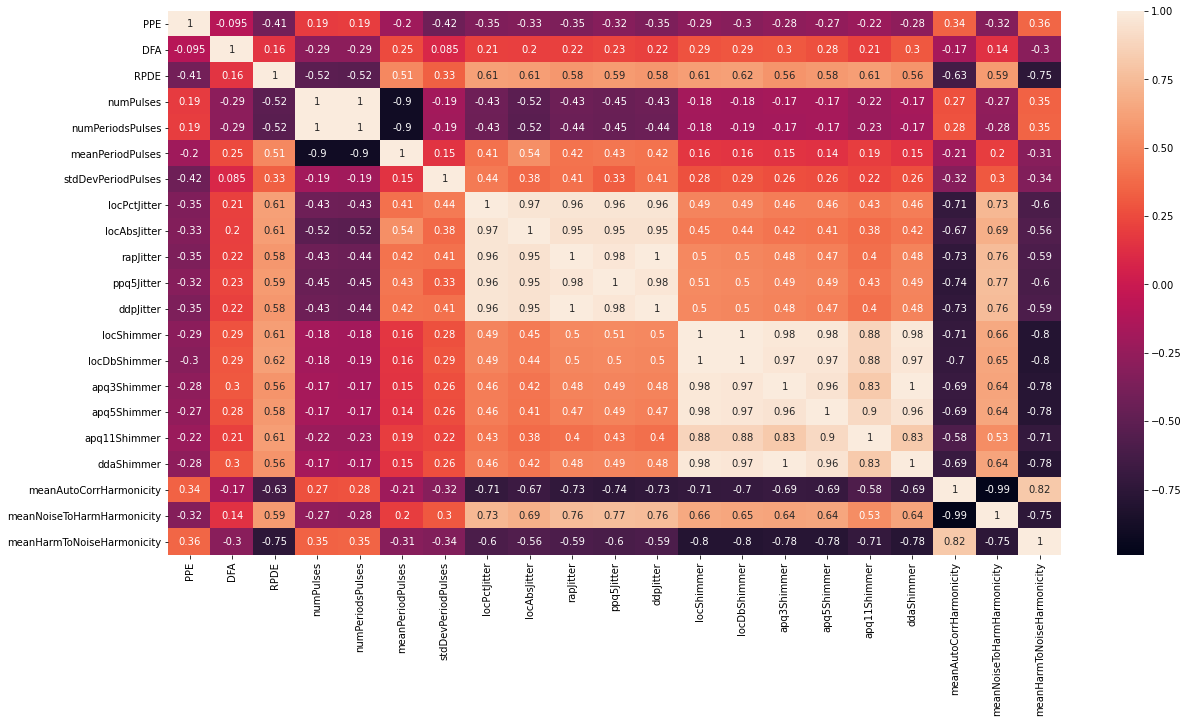

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(baseline_features.corr(), annot=True)

In [17]:
bandwidth_features = df['Bandwidth Parameters']
bandwidth_features.describe()

,b1,b2,b3,b4
count,756.000000,756.000000,756.000000,756.000000
mean,213.363237,297.174077,536.821070,506.604856
std,306.976045,450.125488,754.341717,658.326606
min,13.525000,16.428803,21.164397,22.842528
25%,90.939702,102.856320,152.783110,170.741827
50%,141.610973,159.991186,265.964575,307.971279
75%,234.098376,299.912765,518.822036,557.628796
max,4744.875736,4262.170070,6116.039922,5804.342078


<AxesSubplot:>

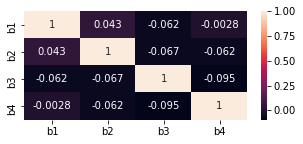

In [22]:
plt.figure(figsize=(5,2))
sns.heatmap(bandwidth_features.corr(), annot=True)

In [23]:
Formant_features = df['Formant Frequencies']
Formant_features.describe()

,f1,f2,f3,f4
count,756.000000,756.000000,756.000000,756.000000
mean,647.174519,1233.852088,2562.425251,3547.259244
std,134.957916,169.090402,393.315598,347.864299
min,237.149533,761.357661,1411.231297,2471.996546
25%,562.879119,1117.316190,2380.426103,3288.644496
50%,641.181498,1215.344125,2612.204198,3544.012403
75%,737.222678,1339.826741,2831.959198,3807.332055
max,1015.524047,1922.747225,3475.648017,4482.258531


<AxesSubplot:>

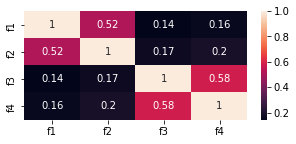

In [24]:
plt.figure(figsize=(5,2))
sns.heatmap(Formant_features.corr(), annot=True)

In [25]:
Intensity_features = df['Intensity Parameters']
Intensity_features.describe()

,minIntensity,maxIntensity,meanIntensity
count,756.000000,756.000000,756.000000
mean,70.828609,76.135371,73.997008
std,8.858268,6.446451,7.018006
min,28.651529,44.133492,39.984109
25%,67.248014,73.322769,70.920615
50%,74.121030,78.581351,76.855313
75%,76.850515,80.402498,78.718785
max,83.908349,86.316176,85.096353


<AxesSubplot:>

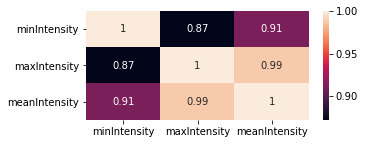

In [26]:
plt.figure(figsize=(5,2))
sns.heatmap(Intensity_features.corr(), annot=True)

In [27]:
Vocal_features = df['Vocal Fold']
Vocal_features.describe()

,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,GNE_SNR_SEO,GNE_NSR_TKEO,GNE_NSR_SEO,VFER_mean,...,VFER_SNR_TKEO,VFER_SNR_SEO,VFER_NSR_TKEO,VFER_NSR_SEO,IMF_SNR_SEO,IMF_SNR_TKEO,IMF_SNR_entropy,IMF_NSR_SEO,IMF_NSR_TKEO,IMF_NSR_entropy
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.904423,32.295832,4.454840,1.092503,0.215038,0.144832,1.567618e+06,1.639264,3.021510,0.001790,...,102.787823,246.160918,1.230503,1.266200,59.852391,2.147575,12.405695,0.210461,12.162500,0.180160
std,0.147826,31.140746,7.313057,0.350789,0.132549,0.060065,3.332799e+05,0.065692,0.047617,0.002622,...,128.291240,276.899266,0.073156,0.085932,125.778801,2.295495,11.105028,0.063268,9.990321,0.033110
min,0.210530,1.735500,0.000000,0.626550,0.023746,0.050828,4.156276e+05,1.433400,2.800600,0.000007,...,0.520950,13.542300,0.944310,1.076800,0.068452,0.005470,0.322760,0.070012,1.613900,0.088559
25%,0.822580,9.764675,0.000000,0.887350,0.132692,0.119680,1.388893e+06,1.603150,2.997350,0.000464,...,26.822925,96.474325,1.181050,1.201100,5.437700,0.731260,4.775250,0.166733,6.551400,0.158125
50%,1.000000,18.768600,0.354165,1.016200,0.184125,0.137810,1.585921e+06,1.636300,3.025550,0.001009,...,61.467450,163.228050,1.228700,1.261900,16.601350,1.509000,9.296400,0.201125,9.019450,0.177575
75%,1.000000,45.821475,5.374000,1.201575,0.264715,0.157510,1.775003e+06,1.666300,3.048025,0.001925,...,125.708325,275.819850,1.283350,1.321300,52.857375,2.718500,16.410825,0.251607,14.035125,0.201437
max,1.000000,194.360800,37.560200,4.957600,1.654100,1.067200,2.610536e+06,2.290500,3.255400,0.031693,...,999.717000,2943.681300,1.403000,1.622000,1116.847100,15.789100,82.053200,0.539200,95.856500,0.319390


<AxesSubplot:>

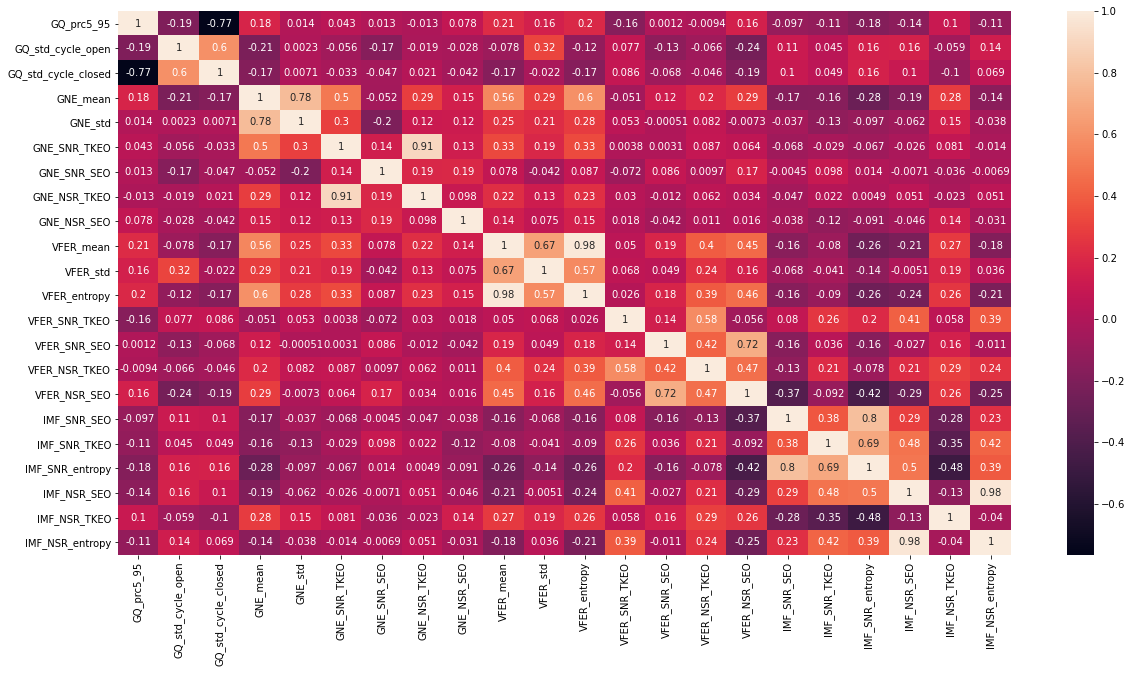

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(Vocal_features.corr(), annot=True)

In [31]:
# Wavelet Features
Wavelet_features = df['Wavelet Features']
Wavelet_features.describe()

,Ea,Ed_1_coef,Ed_2_coef,Ed_3_coef,Ed_4_coef,Ed_5_coef,Ed_6_coef,Ed_7_coef,Ed_8_coef,Ed_9_coef,...,app_LT_TKEO_std_1_coef,app_LT_TKEO_std_2_coef,app_LT_TKEO_std_3_coef,app_LT_TKEO_std_4_coef,app_LT_TKEO_std_5_coef,app_LT_TKEO_std_6_coef,app_LT_TKEO_std_7_coef,app_LT_TKEO_std_8_coef,app_LT_TKEO_std_9_coef,app_LT_TKEO_std_10_coef
count,756.000000,7.560000e+02,7.560000e+02,7.560000e+02,756.000000,756.000000,7.560000e+02,7.560000e+02,756.000000,7.560000e+02,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,99.929173,2.725522e-03,2.694856e-03,2.500349e-03,0.004061,0.003767,3.987253e-03,3.235125e-03,0.013319,3.528308e-03,...,7.261524,19.153162,48.135691,115.213641,260.582447,561.687843,1154.269678,2375.724712,4755.825395,9506.768362
std,0.318604,2.685689e-02,2.412960e-02,2.042017e-02,0.022344,0.023866,1.817387e-02,1.702832e-02,0.071319,2.144414e-02,...,0.863310,2.145435,5.255309,12.341694,28.048029,60.678195,122.751606,255.433040,505.254103,1014.991079
min,95.906900,3.140000e-08,2.570000e-07,9.720000e-07,0.000003,0.000002,4.910000e-07,5.040000e-07,0.000001,2.480000e-07,...,5.133900,13.693700,34.166700,81.517300,185.484500,396.593800,825.539500,1692.114500,3405.244700,6814.581200
25%,99.993800,1.985000e-07,1.447500e-06,6.490000e-06,0.000023,0.000024,2.517500e-05,1.667500e-05,0.000063,1.905000e-05,...,6.657625,17.589125,44.301625,106.066525,240.091925,518.154875,1066.640375,2193.855300,4398.614825,8783.853800
50%,99.998600,4.030000e-07,2.835000e-06,1.245000e-05,0.000051,0.000053,6.535000e-05,4.385000e-05,0.000203,6.970000e-05,...,7.213000,19.079850,48.003800,115.235450,261.004250,562.348100,1156.027350,2378.688200,4765.083900,9524.336200
75%,99.999500,1.515000e-06,8.590000e-06,4.460000e-05,0.000156,0.000184,1.968725e-04,1.551200e-04,0.000877,3.173600e-04,...,7.764650,20.525025,51.679475,123.759400,280.014875,604.031950,1238.257800,2550.172675,5102.537200,10203.837900
max,100.000000,5.181200e-01,4.439500e-01,4.950500e-01,0.411850,0.377610,2.536300e-01,3.197900e-01,0.955510,4.757500e-01,...,12.227500,28.604600,71.918300,157.786700,357.355800,771.966200,1621.512300,3278.343300,6611.114700,13175.354000


In [34]:
# plt.figure(figsize=(50,40))
# sns.heatmap(Wavelet_features.corr(), annot=True)